<div>
Olá, Heury!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v1 </b> <a class="tocSkip"></a>
<s>
    
Obrigado por enviar o seu projeto e pelo esforço para executar as etapas necessárias.   
<br>
    
No geral, o seu projeto está muito bom, você implementou corretamente a maioria das questões e mostrou excelentes habilidades de manipulação de dados. Entretanto, deixei alguns comentários com pequenos ajustes que precisamos fazer antes de seguirmos. Peço que trabalhe nesse ponto para avançarmos!
    
<br>
    
Se tiver alguma dúvida, pode contar comigo.
    
<br>   

**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# 1 - Análise Inicial dos Dados

Importando as bibliotecas necessárias

In [4]:
import pandas as pd
import scipy.stats as stats

 <div style="background-color: lightblue; padding: 10px; border-radius: 5px;">Importando os arquivos necessários</div>

In [5]:
df_trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')
df_average_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

Verificando os dados dos dataframes criados

In [6]:
#Informações Gerais dos datasets
print("Informações gerais sobre df_trips_amount:")
print(df_trips_amount.info(), "\n")

print("Informações gerais sobre df_average_trips:")
print(df_average_trips.info(), "\n")

# Estatísticas descritivas dos datasets
print("Estatísticas descritivas - Número de corridas por empresa:")
print(df_trips_amount.describe(), "\n")

print("Estatísticas descritivas - Média de corridas por bairro:")
print(df_average_trips.describe(), "\n")

# Verificar valores ausentes
print("Valores ausentes em df_trips_amount:")
print(df_trips_amount.isnull().sum(), "\n")

print("Valores ausentes em df_average_trips:")
print(df_average_trips.isnull().sum(), "\n")

# Verificar valores duplicados
print("Duplicatas em df_trips_amount:", df_trips_amount.duplicated().sum(), "\n")
print("Duplicatas em df_average_trips:", df_average_trips.duplicated().sum(), "\n")

# Exibir as primeiras linhas dos DataFrames
print("Primeiras linhas de df_trips_amount:")
print(df_trips_amount.head(), "\n")

print("Primeiras linhas de df_average_trips:")
print(df_average_trips.head(), "\n")

Informações gerais sobre df_trips_amount:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None 

Informações gerais sobre df_average_trips:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None 

Estatísticas descritivas - Número de corridas por empresa:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os arquivos de dados foram carregados corretamente
- As bibliotecas foram carregadas corretamente
- O método `head()` foi  utilizado para exibir uma amostra inicial dos seus dados
- Bom trabalho usando o método `describe()` para analisaras estatísticas descritivas do conjunto de dados.
</div>

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">Pelo que podemos verificar: 
O dataset df_trips_amout possui 64 registros e o dataset df_average_trips possui 94 registros. <br>
Os datasets não possuem valores ausentes ausentes ou duplicados.<br>

Analisando os tipos dos dados:
trips_amount - int64 (correto).<br>
average_trips - float64 (correto).<br>
Sendo assim, não há necessidade de converter os tipos de dados.</div>

# 2 - Análise Exploratória dos Dados

### 2.1 - Identificando os 10 bairros por número médio de corridas em novembro de 2017

In [7]:
#Identificando os 10 principais bairros em termos de destinos
# Ordenando os bairros por número médio de corridas e pegar os 10 primeiros
top_10_bairros = df_average_trips.sort_values(by='average_trips', ascending=False).head(10)

# Exibindo os 10 bairros principais
top_10_bairros

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### 2.2 - GERANDO OS GRÁFICOS

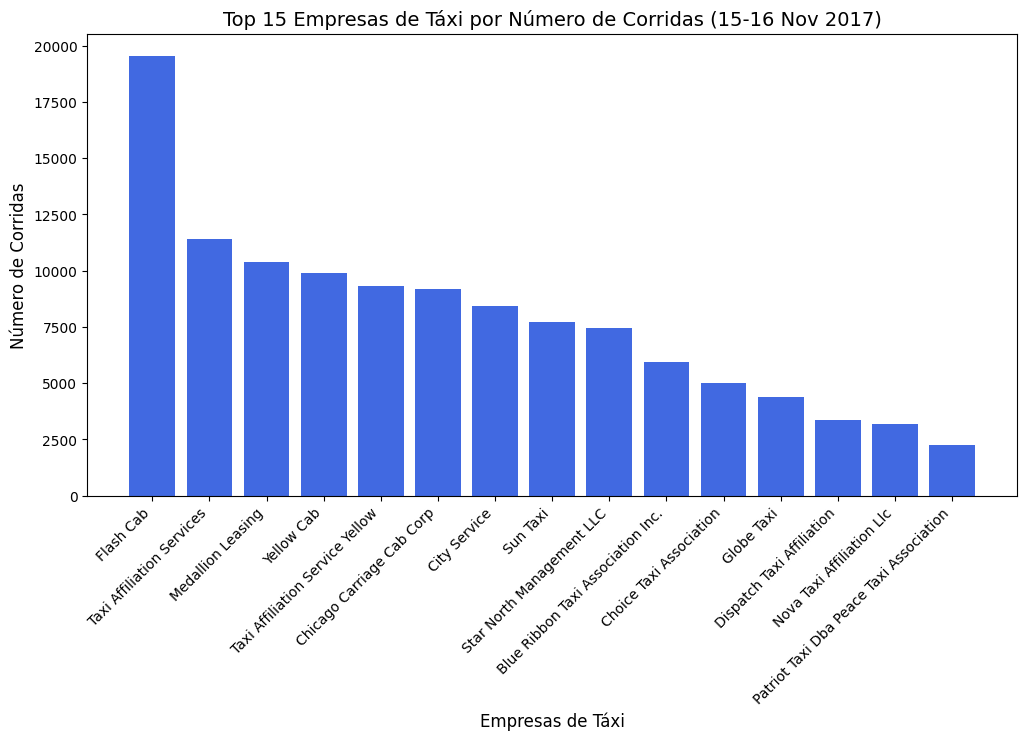

In [8]:
import matplotlib.pyplot as plt

# Gráfico 1: Empresas de Táxi e Número de Corridas
import matplotlib.pyplot as plt

# Ordenando os dados em ordem decrescente
df_trips_amount_sorted = df_trips_amount.sort_values(by='trips_amount', ascending=False)

# Selecionando apenas as 15 principais empresas para melhorar a visualização do gráfico
top_n = 15
df_top_trips = df_trips_amount_sorted.head(top_n)
plt.figure(figsize=(12, 6))
plt.bar(df_top_trips['company_name'], df_top_trips['trips_amount'], color='royalblue')
plt.xlabel("Empresas de Táxi", fontsize=12)
plt.ylabel("Número de Corridas", fontsize=12)
plt.title(f"Top {top_n} Empresas de Táxi por Número de Corridas (15-16 Nov 2017)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">Pelo gráfico, podemos perceber que a empresa Flash Cab domina o mercado.<br>
A empresa possui quase 20 mil corridas, estando bem à frente das demais.<br>

Podemos presumir que há uma forte presença no mercado ou uma frota muito maior.<br>

As três principais empresas: Flash Cab, Taxi Affiliation Services e Medallion Leasing têm um número bem superior de corridas em relação às demais.<br>
Juntas, essas três empresas representam uma grande parcela do total de viagens.<br>
Parece que a queda no número de corridas é gradual até um certo ponto, mas depois de Choice Taxi Association, a quantidade de corridas diminui mais rapidamente.<br>
Empresas como Patriot Taxi Dba Peace Taxi Association e Nova Taxi Affiliation LLC têm menos de 4 mil corridas, enquanto Flash Cab tem quase cinco vezes mais.</div>

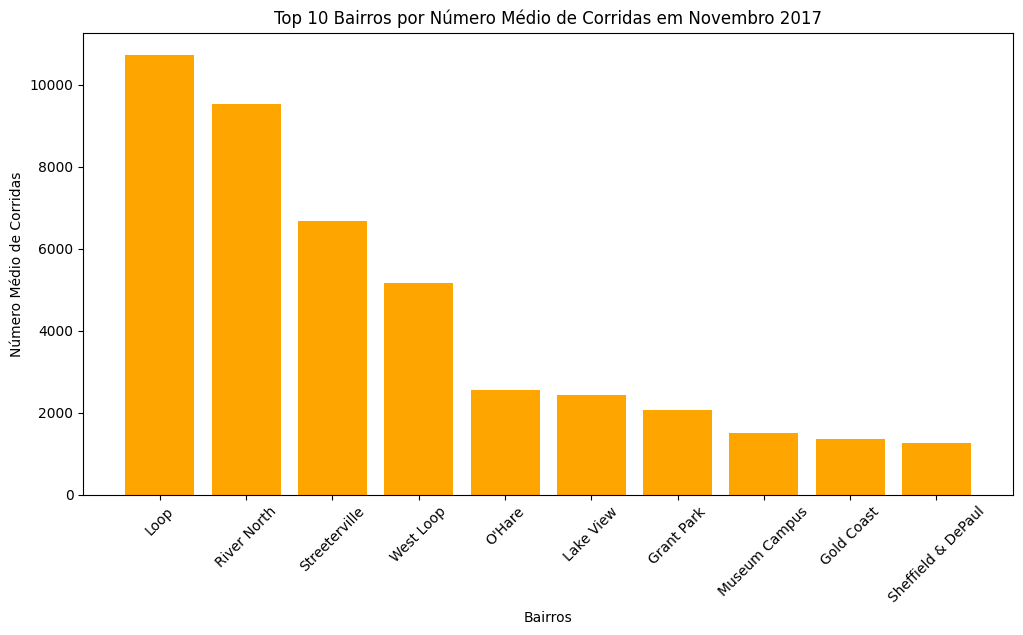

In [9]:
# Gráfico 2: Top 10 Bairros como Destino
plt.figure(figsize=(12, 6))
plt.bar(top_10_bairros['dropoff_location_name'], top_10_bairros['average_trips'], color='orange')
plt.xlabel("Bairros")
plt.ylabel("Número Médio de Corridas")
plt.title("Top 10 Bairros por Número Médio de Corridas em Novembro 2017")
plt.xticks(rotation=45)
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">Podemos verificar pelo gráfico que o bairro Loop é o principal destino de corridas.<br>
O bairro lidera com mais de 10 mil corridas, sendo o destino mais popular de Chicago.<br>

Isso faz sentido, pois sabemos que Loop é o centro financeiro e comercial da cidade, onde há um grande fluxo de pessoas.<br>

River North aparece logo atrás, com uma quantidade ligeiramente menor de corridas que o Loop.<br>
O bairro é famoso por seus restaurantes, vida noturna e atrações turísticas, o que pode explicar a alta demanda.
Streeterville e West Loop também são populares.

Apesar de ser um aeroporto internacional, O'Hare tem bem menos corridas do que bairros centrais.<br>
Isso pode indicar que passageiros preferem outras formas de transporte para chegar ao aeroporto (trens, carros particulares, ônibus expressos).<br>

Já os bairros: Lake View, Grant Park, Museum Campus, Gold Coast e Sheffield & DePaul aparecem no ranking, <br>mas com um número bem menor de corridas.<br>
São áreas residenciais e turísticas, o que pode indicar que há tráfego de visitantes, mas não em volumes tão altos.</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os 10 principais bairros em número de corridas foram analisados
- As principais empresas em número de corridas foram analisadas
- Um gráfico de barras foi construído
</div>

# 3 - Testando hipóteses (Python)

### 3.1 - Salvando, verificando e otimizando o DataFrame

In [10]:
df_sql_result = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv')

In [11]:
df_sql_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">Podemos verificar que não há valores ausentes.<br>
A coluna start_ts está como object, então precisamos convertê-la para datetime, para análises temporais.</div>

In [12]:
# Convertendo start_ts para datetime
df_sql_result['start_ts'] = pd.to_datetime(df_sql_result['start_ts'])

# Verificando se a conversão foi bem-sucedida
print(df_sql_result.dtypes)

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


In [13]:
df_sql_result

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


### 3.2 - Testando Hipóteses

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">Hipótese Nula (H₀):<br> 
A duração média das corridas nos sábados chuvosos é igual à duração média nos outros sábados.<br> 
(Ou seja, a chuva não tem impacto significativo na duração das corridas aos sábados.)<br>

Hipótese Alternativa (H₁):<br> A duração média das corridas nos sábados chuvosos é diferente da duração média nos outros sábados.<br> (Ou seja, a chuva influencia no tempo das corridas aos sábados.)<br>
    
Vamos definir α = 0.05 (5%).<br>
Isso significa que aceitaremos 5% de chance de erro, para poder rejeitar a hipótese nula.<br>

Como estamos comparando comparando a duração média de duas amostras independentes, vamos utilizar o Teste t de Student.<br>

</div>



<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
    
Aqui precisamos de um pequeno ajuste:
    
- [x] Você precisa calcular a variância para os dias chuvosos e não chuvosos com o objetivo de definir o argumento `equal_var` do método `stats.ttest_ind(..)` (dica: aqui você pode executar um teste estatístico também para comparar as variâncias):
```python
# descobrir se as variâncias são diferentes
sabados_chuvosos.var(), sabados_normais.var()
```   
</s>
</div>

In [15]:
# Filtrando apenas os sábados (dayofweek == 5 representa sábado)
df_sql_result['day_of_week'] = df_sql_result['start_ts'].dt.dayofweek
saturdays = df_sql_result[df_sql_result['day_of_week'] == 5]

# Separando corridas em sábados chuvosos e não chuvosos
sabados_chuvosos = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']
sabados_normais = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']

# Calculando as variâncias
var_chuvosos = sabados_chuvosos.var()
var_normais = sabados_normais.var()

# Usando o Teste de Levene para comparar variâncias
levene_test = stats.levene(sabados_chuvosos, sabados_normais)

# Definindo equal_var com base no teste de Levene
equal_var = levene_test.pvalue > 0.05

# Teste T para comparação das médias
t_test = stats.ttest_ind(sabados_chuvosos, sabados_normais, equal_var=equal_var)

# Definindo o nível de significância
alpha = 0.05

# Exibindo os resultados
print("Variância Sábados Chuvosos:", var_chuvosos)
print("Variância Sábados Normais:", var_normais)
print("P-valor do teste de Levene:", levene_test.pvalue)
print("As variâncias são iguais?", equal_var)
print("P-valor do teste T:", t_test.pvalue)

# Interpretação do teste de hipóteses
if t_test.pvalue < alpha:
    print("Rejeitamos a hipótese nula. A chuva influencia no tempo das corridas aos sábados.")
else:
    print("Não rejeitamos a hipótese nula. A chuva não tem um impacto significativo na duração das corridas aos sábados.")

Variância Sábados Chuvosos: 520294.086002483
Variância Sábados Normais: 576382.009689509
P-valor do teste de Levene: 0.5332038671974493
As variâncias são iguais? True
P-valor do teste T: 6.517970327099473e-12
Rejeitamos a hipótese nula. A chuva influencia no tempo das corridas aos sábados.


 <div style="background-color: lightblue; padding: 10px; border-radius: 5px;"><strong>Análise dos resultados:</strong><br>
Além do Teste T de Student, utilizei o teste de Levene, para verificar se as variações das duas amostras são significativamente diferentes.<br>
Como resultado do valor p foi 0,533... superior ao valor alpha (0.05), constatamos que as variações das duas amostras podem ser consideradas estatisticamente iguais.<br>
Já no Teste T de Student, o valor p foi 6.517970327099473e-12, ou seja, extremamente inferior ao valor alpha  (0.05), por isso rejeitamos a hipótese nula. <br>
    <strong>Conclusão:</strong><br>
Em dias chuvosos, as corridas demoram mais.<br>
As possíveis causas podem ser:<br>
- Trânsito mais lento devido à visibilidade reduzida e ruas escorregadias.<br>
- Mais demanda por táxis, resultando em mais tempo de espera e mais carros na rua.<br>
- Rotas mais longas, pois motoristas podem evitar áreas alagadas ou congestionadas.<br>
<br>
<strong>Sugestão para as empresas de táxi: </strong> <br> Ajustar melhor os preços ou planejar frotas para melhorar a eficiência nos dias de chuva.</div>